# PROBLEMA 2
Una empresa dedicada a la distribución de agua potable ha recabado datos históricos relacionada con la cantidad de sulfatos y nitratos presentes en el agua. Dicha empresa tiene la suposición de que la cantidad de sulfatos en el agua está fuertemente correlacionada con la cantidad de nitratos presentes en la misma, tal que a mayor cantidad de los primeros, mayor cantidad de los segundos.

Los datos históricos relacionados con el análisis de estos componentes en el agua se presenta en la carpeta comprimida adjunta (distributed-data.zip). Nótese que en los datos existen instancias en las cuales no hay registro de las cantidades de sulfatos/nitratos, las cuales se asumen se derivan de fallas en los instrumentos utilizado para hacer estas mediciones.

**Analice dichos datos y realice las siguientes tareas:**
- a. Construir un único dataset utilizando toda la información histórica proporcionada por la empresa.
- b. Generar un histograma que presente el número de mediciones "utiles" VS las mediciones erroneas presentadas por los instrumentos de medición e indique: ¿Qué tan grande es la proporción de mediciones erróneas en comparación a las mediciones útiles del instrumento?
- c. Construir un modelo de regresión lineal en el que se establezca la relación entre las variables sulfato/nitratos utilizando el dataset generado. Indique los parámetros de dicho modelo.
- d. Indicar si la correlación entre la cantidad de sulfatos/nitratos es tal como la plantea la empresa. Justificar su respuesta.

In [17]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [19]:
data_dir = 'data/distributed-data'
all_files = os.listdir(data_dir)
csv_files = [f for f in all_files if f.endswith('.csv')]
df2 = pd.DataFrame()
for file in csv_files:
    df_temp = pd.read_csv(os.path.join(data_dir, file))
    try:
        df2 = pd.concat([df2, df_temp], ignore_index=True)
    except:
        df2 = df_temp
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772087 entries, 0 to 772086
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Date     772087 non-null  object 
 1   sulfate  118783 non-null  float64
 2   nitrate  114349 non-null  float64
 3   ID       772087 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 23.6+ MB


In [20]:
df2 = df2[['sulfate', 'nitrate']]

In [21]:
df_diff = df2[df2['sulfate'].notna() & df2['nitrate'].isna() | df2['nitrate'].notna() & df2['sulfate'].isna()]

In [24]:
df_diff.shape

(9528, 2)

In [4]:
def get_n_bins(data):
    # Calcula el número óptimo de bins para un histograma usando la regla de Sturges.
    M = len(data)
    c = int(np.ceil(1+np.log2(M)))
    return c

/tmp/ipykernel_21395/3621893946.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([df2['sulfate'], df2['nitrate']], labels=['Sulfato', 'Nitrato'])


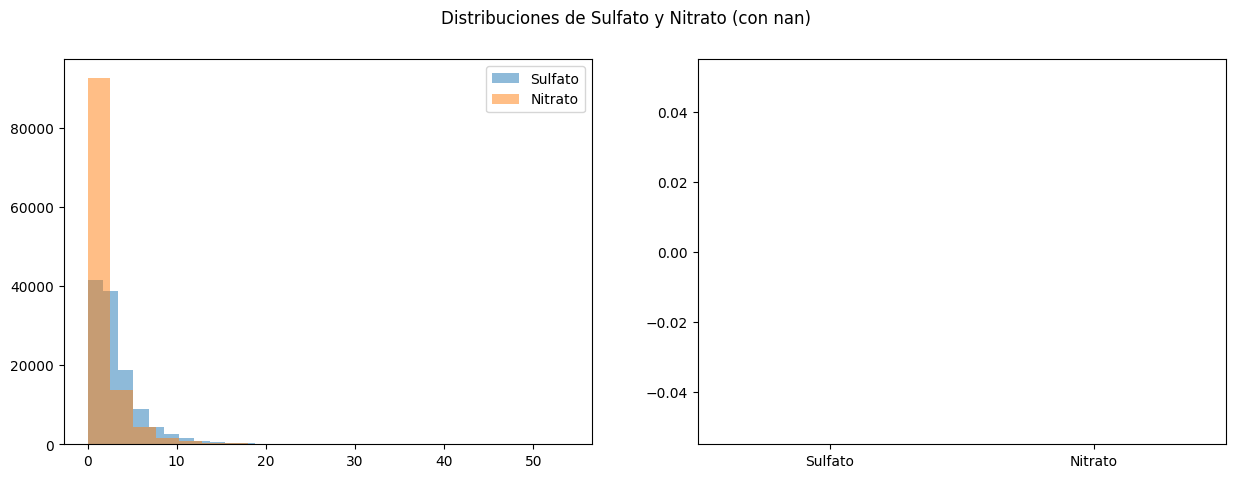

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sulfate_bins = get_n_bins(df2['sulfate'])
nitrate_bins = get_n_bins(df2['nitrate'])
ax[0].hist(df2['sulfate'], bins=sulfate_bins, alpha=0.5, label='Sulfato')
ax[0].hist(df2['nitrate'], bins=nitrate_bins, alpha=0.5, label='Nitrato')
ax[0].legend()

ax[1].boxplot([df2['sulfate'], df2['nitrate']], labels=['Sulfato', 'Nitrato'])
plt.suptitle('Distribuciones de Sulfato y Nitrato (con nan)')
plt.show()

In [6]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111802 entries, 21 to 771849
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   sulfate  111802 non-null  float64
 1   nitrate  111802 non-null  float64
dtypes: float64(2)
memory usage: 2.6 MB


/tmp/ipykernel_21395/1613198457.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([df2['sulfate'], df2['nitrate']], labels=['Sulfato', 'Nitrato'])


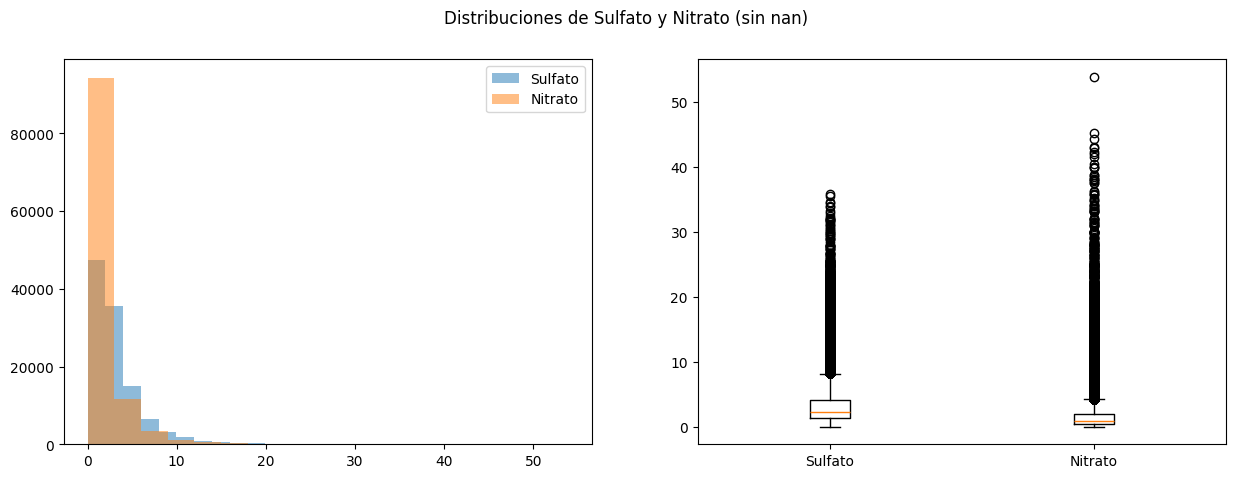

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sulfate_bins = get_n_bins(df2['sulfate'])
nitrate_bins = get_n_bins(df2['nitrate'])
ax[0].hist(df2['sulfate'], bins=sulfate_bins, alpha=0.5, label='Sulfato')
ax[0].hist(df2['nitrate'], bins=nitrate_bins, alpha=0.5, label='Nitrato')
ax[0].legend()

ax[1].boxplot([df2['sulfate'], df2['nitrate']], labels=['Sulfato', 'Nitrato'])
plt.suptitle('Distribuciones de Sulfato y Nitrato (sin nan)')
plt.show()

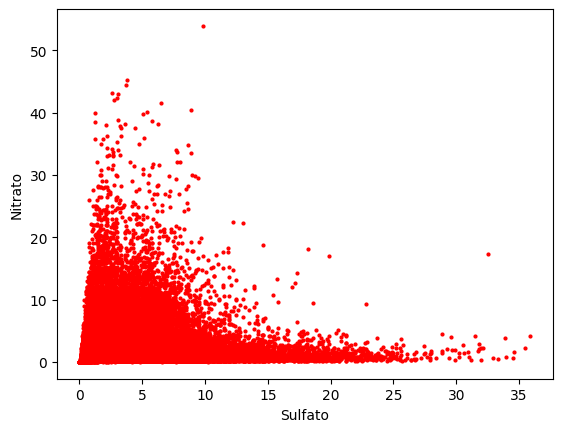

In [9]:
plt.plot(df2['sulfate'], df2['nitrate'], "ro", markersize=2)
plt.xlabel('Sulfato')
plt.ylabel('Nitrato')
plt.show()

In [10]:
df_train, df_test = train_test_split(df2, test_size=0.3)

In [11]:
def val_model(model: LinearRegression, x, y):
    preds = model.predict(x)
    SSD = np.sum((y-preds)**2)
    RSE = np.sqrt(SSD/(len(x)-1))
    # Calcular RSE_%
    y_mean = np.mean(y)
    RSE_rate = RSE/y_mean
    print("Score = ",model.score(x,y))
    print("SSD = ",SSD)
    print("RSE = ",RSE)
    print("RSE_% = ",RSE_rate)
    return preds

In [12]:
lm = LinearRegression()
lm.fit(df_train[['sulfate']], df_train['nitrate'])
pred_train = val_model(lm, df_train[['sulfate']], df_train['nitrate'])

Score =  0.0034398725056702384
SSD =  495852.91723829217
RSE =  2.517135035429549
RSE_% =  1.4749346702106634


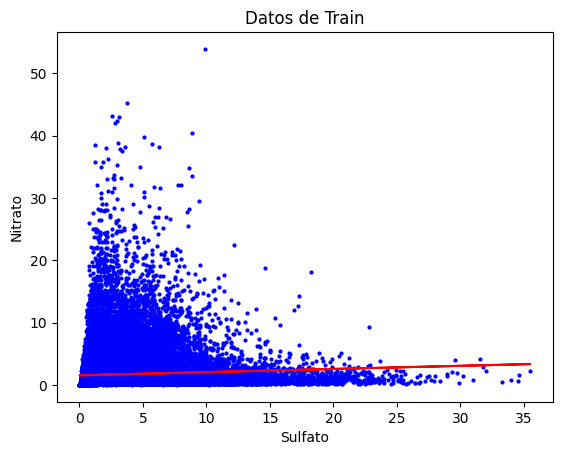

In [13]:
plt.plot(df_train['sulfate'], df_train['nitrate'], "bo", markersize=2)
plt.plot(df_train['sulfate'], pred_train, 'r')
plt.title("Datos de Train")
plt.xlabel('Sulfato')
plt.ylabel('Nitrato')
plt.show()

In [14]:
pred_test = val_model(lm, df_test[['sulfate']], df_test['nitrate'])

Score =  0.004931613368193033
SSD =  210872.57590764508
RSE =  2.5074282956746865
RSE_% =  1.4663332491829604


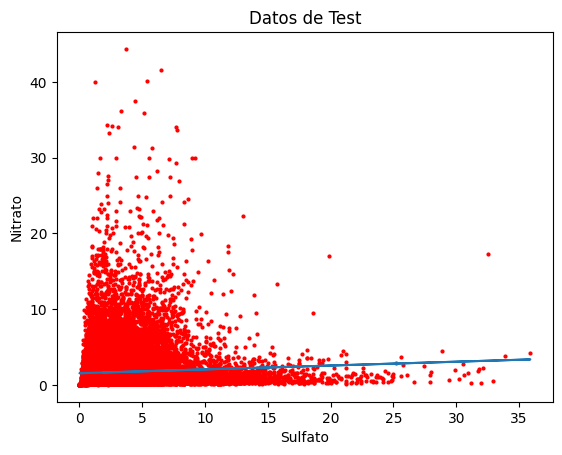

In [15]:
plt.plot(df_test['sulfate'], df_test['nitrate'], "ro", markersize=2)
plt.plot(df_test['sulfate'], pred_test)
plt.title("Datos de Test")
plt.xlabel('Sulfato')
plt.ylabel('Nitrato')
plt.show()


In [25]:
df2.corr()

,sulfate,nitrate
sulfate,1.000000,0.062434
nitrate,0.062434,1.000000


In [27]:
correlacion = df2['sulfate'].corr(df2['nitrate'], method='pearson')
print(f"Correlación de Pearson: {correlacion:.4f}")

Correlación de Pearson: 0.0624
